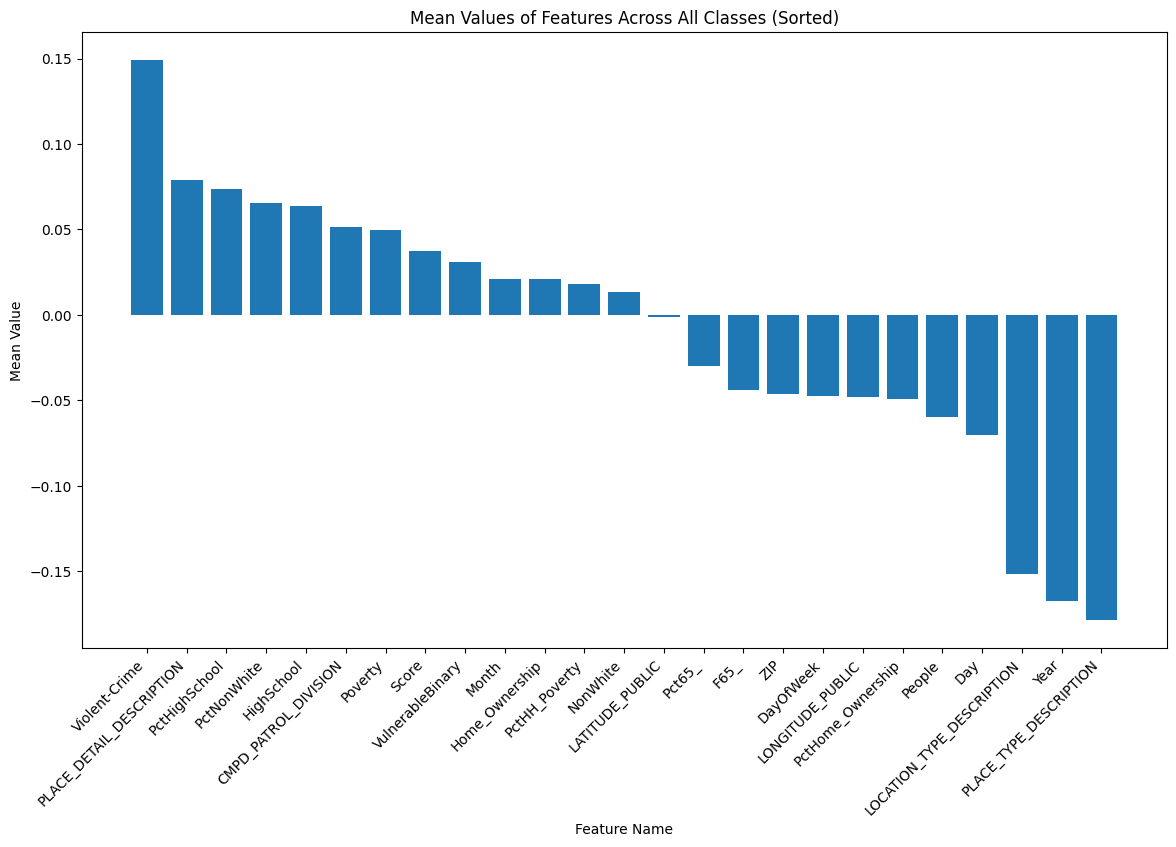

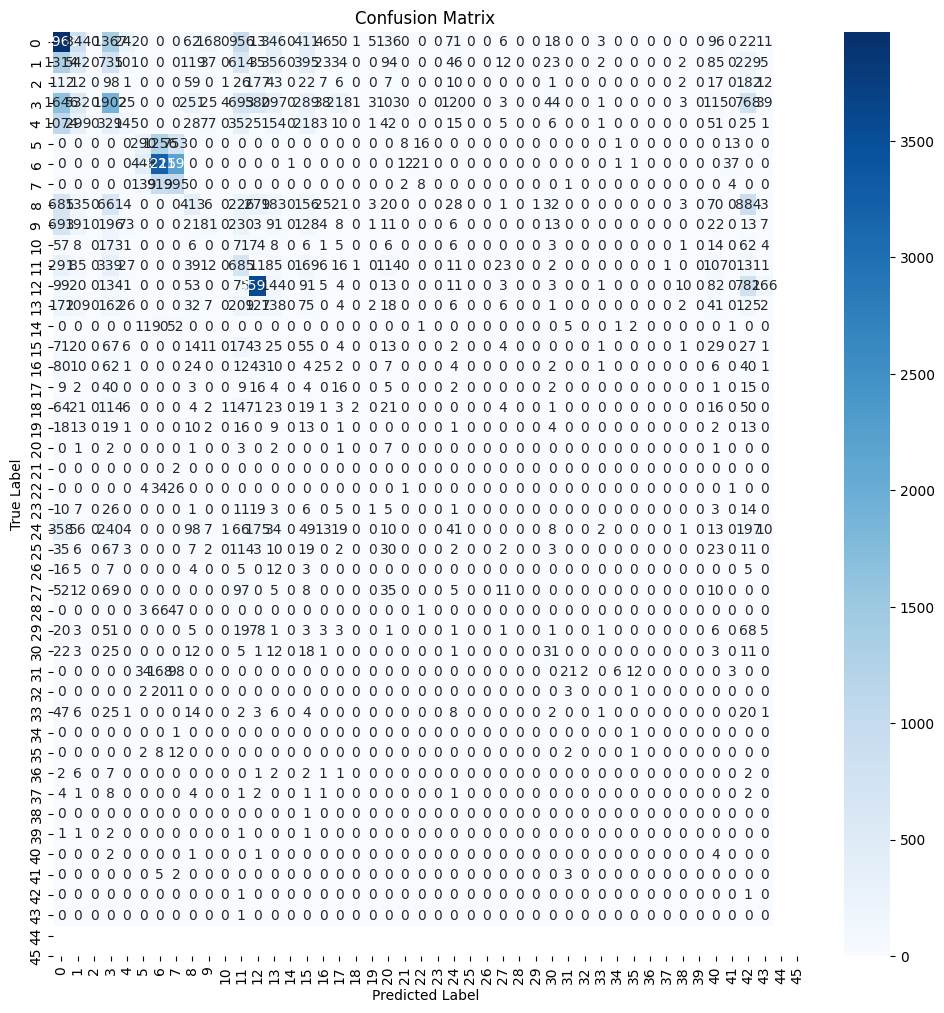

              precision    recall  f1-score   support

           0       0.36      0.45      0.40      8842
           1       0.18      0.11      0.14      4803
           2       1.00      0.00      0.00       795
           3       0.27      0.25      0.26      7700
           4       0.22      0.05      0.08      2841
           5       0.31      0.12      0.18      2337
           6       0.56      0.54      0.55      5927
           7       0.24      0.48      0.32      2068
           8       0.32      0.11      0.16      3839
           9       0.19      0.05      0.07      1792
          10       0.00      0.00      1.00       506
          11       0.14      0.32      0.20      2156
          12       0.69      0.68      0.68      5289
          13       0.07      0.11      0.08      1264
          14       0.00      0.00      1.00       163
          15       0.03      0.10      0.04       528
          16       0.12      0.07      0.09       334
          17       0.04    

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("C:/Users/aidan_000/Desktop/UNCC/ML Project/Datasets/df6.csv", low_memory=False)

# Encode the target variable
df['HIGHEST_NIBRS_DESCRIPTION'] = LabelEncoder().fit_transform(df['HIGHEST_NIBRS_DESCRIPTION'])

# Separate features and target variable
y = df.pop('HIGHEST_NIBRS_DESCRIPTION').values
x = StandardScaler().fit_transform(df.values)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train Gaussian Naive Bayes classifier
classifier = GaussianNB()
classifier.fit(x_train, y_train)

# Extract mean and standard deviation for each feature
means = classifier.theta_

# Create a single bar for each feature index
feature_names = df.columns
means_df = pd.DataFrame({'Feature': feature_names, 'Mean': np.mean(means, axis=0)})
means_df = means_df.sort_values(by='Mean', ascending=False)
plt.figure(figsize=(14, 8))
plt.bar(means_df['Feature'], means_df['Mean'])
plt.xlabel('Feature Name')
plt.ylabel('Mean Value')
plt.title('Mean Values of Features Across All Classes (Sorted)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


plt.figure(figsize=(12, 12))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Display the classification report
report = classification_report(y_test, y_pred, zero_division=1)
print(report)